# Chapter05 離散型確率変数

In [40]:
# ライブラリーの準備
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

plt.style.use('seaborn')
rcParams['font.family'] = 'IPAexgothic'
%precision 3
%matplotlib inline


## 5.1 １次元の離散型確率変数

### 5.1.1 １次元の離散型確率変数の定義

- 確率変数は、
  - 「とりうる値」と「その値が出る確率」によって定義される
- 離散型確率変数の場合、
  - 確率変数 $X$ のとりうる値の集合を $\{x_1, x_2, ...\}$ として、
  - 確率変数 $X$ が $x_k$ という値をとる確率を
  - $ P(X = x_k) = p_k~~~(k = 1, 2, ...) $
- と定義できる。
- このとき「確率」は、「とりうる値 $x$ を引数にとる関数」とみることもできるため、
  - $ f(x) = P(X = x) $
  - となる「関数 $f(x)$ 」と考えることができる。
  - これを、
    - 「確率質量関数（probability mass function, PMF）」または、
    - 「確率関数（probability function）」
  - と呼ぶ。
- 確率分布とは、
  - 「とりうる値」と「その確率」の具体的な対応を表したもの
  - 「確率変数の確率分布」が決まることで、「その確率変数の振る舞い」が定まることになる。

#### いかさまサイコロの確率分布の作成

In [41]:
# とりうる値の集合 x_set
x_set = np.array([1, 2, 3, 4, 5, 6])


いかさまサイコロの確率関数

$$
f(x) = \begin{cases}
          x/21~~~(x \in \{1,2,3,4,5,6\})
          \\
          0~~~(\text{otherwise})
       \end{cases}
$$

In [42]:
# いかさまサイコロの確率関数
def f(x):
    """いかさまサイコロの確率関数"""
    if x in x_set:
        return x /21
    else:
        return 0

「とりうる値の集合」と「確率関数」のセットで、「確率分布」が決まる。

これによって、「確率変数 $X$ の振る舞い」が決まる。

In [43]:
# 確率変数X の定義
X = [x_set, f]
X

[array([1, 2, 3, 4, 5, 6]), <function __main__.f(x)>]

In [44]:
# 確率p_kを求める
prob = np.array([f(x_k) for x_k in x_set])

# x_kとp_kの対応を辞書型にして表示する
dict(zip(x_set, prob))

{1: 0.048, 2: 0.095, 3: 0.143, 4: 0.190, 5: 0.238, 6: 0.286}

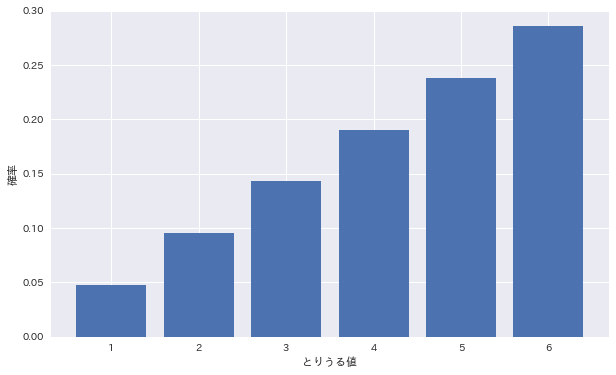

In [45]:
# 「とりうる値」と「確率」を棒グラフに図示する
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.bar(x_set, prob)
ax.set_xlabel('とりうる値')
ax.set_ylabel('確率')

plt.show()

#### 確率の性質

- 確率は絶対に0以上
- すべての確率を足すと、1にならなければならない

$$
\begin{align}
    f(x_k) \geq 0 \\
    \sum_{k} f(x_k) = 1
\end{align}
$$

In [46]:
# 確率がすべて0以上であるかの確認 np.all()関数
np.all(prob >= 0)

True

In [47]:
# 確率の総和の確認
np.sum(prob)

1.000

#### 累積分布関数（cumulative distribution function, CDF）

- 「確率関数」
  - 「確率変数$X$」が、「$x$になるときの確率」を返す関数
- 「累積分布関数」
  - 「確率変数$X$」が、「$x$以下になるときの確率」を返す関数
  - サイコロの出目が「3」以下になる確率など

$$
F(x) = P(X \leq x) = \sum_{x_k \leq x} f(x_k)
$$

In [48]:
# 累積分布関数を作成する
def F(x):
    """いかさまサイコロの累積分布関数"""
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [49]:
# サイコロの出目が「3」以下になる確率
F(3)

0.286

#### 確率変数の変換

- 確率変数$X$に、2をかけて3を足した、$2X+3$は、
- 確率変数$2X+3$になる

In [50]:
# 2X+3を確率変数Yとし、Yの確率分布を作成する
y_set = np.array([2 * x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set, prob))

{5: 0.048, 7: 0.095, 9: 0.143, 11: 0.190, 13: 0.238, 15: 0.286}

### 5.1.2 １次元の離散型確率変数の指標

#### 期待値（expected value）

- 期待値
  - 確率変数の平均
  - $E(X)$
    - 期待値の演算としての意味合いが強い場合に用いる
  - $\mu$
    - 期待値の値そのものに関心がある場合に用いる
- 離散型確率変数の期待値（平均）は、
  - 確率変数の「とりうる値とその確率の積」の「総和」
  - 確率変数を無限回試行して得られた実現値の平均に一致する

$$
E(X) = \sum_{k} x_k f(x_k)
$$

In [51]:
# いかさまサイコロの期待値を定義どおりに計算する
np.sum([x_k * f(x_k) for x_k in x_set])

4.333

In [52]:
# いかさまサイコロを100万（=10^6）回試行した実現値の平均を求める
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.334

確率変数$X$を、$2X+3$に変換した確率変数$Y$の期待値

$$
E(Y) = E(2X + 3) = \sum_{k} (2x_k + 3)f(x_k)
$$

#### 離散型確率変数の期待値

より一般的に、確率変数$X$の関数$g(X)$の期待値が定義できる。

$$
E(g(X)) = \sum_{k} g(x_k)f(x_k)
$$

引数$g$が、「確率変数に対する変換の関数」になっている。

In [53]:
# 期待値の関数を実装する
def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [54]:
E(X)

4.333

In [55]:
E(X, g=lambda x: 2*x + 3)

11.667

期待値の線形性

a, bを実数、$X$を確率変数としたとき

$$
E(aX + b) = aE(X) + b
$$

が成り立つ。

In [56]:
2 * E(X) + 3

11.667

#### 分散

- 偏差の二乗の期待値として定義される。
- $V(X)$
  - 分散の演算としての意味合いが強い場合に用いる
- $\sigma^2$
  - 分散の値そのものに関心がある場合に用いる
- $\sigma$
  - 確率変数$X$の標準偏差

$$
V(X) = \sum_{k}(x_k - \mu)^2f(x_k)
$$

In [57]:
# いかさまサイコロの分散を求める
mean = E(X)
np.sum([(x_k-mean)**2 * f(x_k) for x_k in x_set])

2.222

- 変換した確率変数についても分散を定義できる。
- 確率変数$X$を、$2X + 3$と変換した確率変数$Y$を考える。
- $\mu = E(2X + 3)$

$$
V(2X + 3) = \sum_{k}\left((2x_k + 3) - \mu \right)^2 f(x_k)
$$

#### 離散型確率変数の分散

より一般的に、確率変数$X$の関数$g(X)$の分散が定義できる。

$$
V(g(X)) = \sum_{k} (g(x_k) - E(g(X)))^2 f(x_k)
$$

In [58]:
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

In [59]:
V(X)

2.222

In [60]:
V(X, lambda x: 2*x + 3)

8.889

#### 分散の公式

a, bを実数、$X$を確率変数として、

$$
V(aX + b) = a^2V(X)
$$

が成り立つ。

In [61]:
# V(2X + 3) = 2^2V(X)
2**2 * V(X)

8.889

## ２次元の離散型確率変数

### 5.2.1 ２次元の離散型確率変数の定義

#### 同時確率分布（join probability distribution）, 同時分布

- ２次元の確率変数では、
  - １次元の確率変数を２つ同時に扱い$(X, Y)$と表記する。
- ２次元の確率変数の振る舞いは、
  - 「取りうる値の組み合わせの集合」と「その確率」に
- よって定まる。

- $(X, Y)$のとりうる値の組み合わせの集合を、
  - $\{(x_i, y_j)~|~i = 1, 2, ...; j = 1, 2, ...\}$
- とすると、
- 確率はそれぞれのとりうる値の組み合わせについて定義できて、
- 確率変数$X$が$x_i$、確率変数$Y$が$y_j$をとる確率は、
  - $P(X = x_i, Y = y_j) = p_{ij}~~(i = 1, 2, ...; j = 1, 2, ...)$
- と表すことができる。